<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Creating a Convoution Instance

In [ ]:
#create a conv2d class instance with parameters
#parameters
inChans = 3 #RGB
outChans = 15
krnSize = 5 #should be odd
stride = 1
padding = 0

In [ ]:
#create the instance (cf nn.Linear)
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [ ]:
print('Size of weights: '+str(c.weight.shape) )
print('Size of bias: '+str(c.bias.shape) )

Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


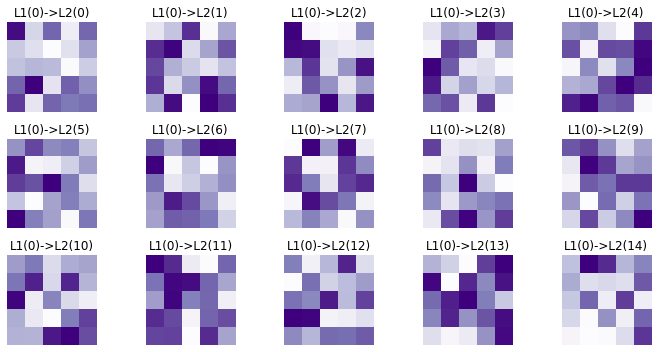

In [ ]:
# kernels
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

Convolve with an image

In [ ]:
#size of image (N, RGB, height,width)
imsize = (1,3,64,64)
img=torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last
# therfore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


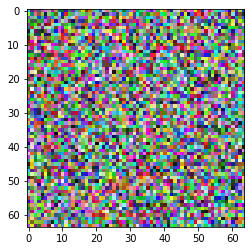

In [ ]:
plt.imshow(np.squeeze(img2view))

In [ ]:
# convolve the img with filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


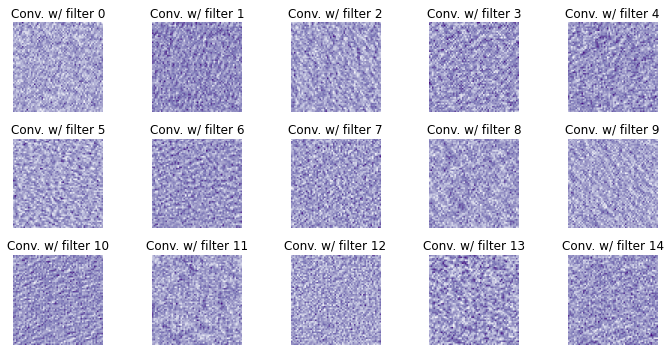

In [ ]:
# what do convolved images look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))
for i,ax in enumerate(axs.flatten()):
  # extract this 'layer' of conv result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()